# **Fertilizer Recommendation**

## **1. Problem Understanding**

### Project Overview
Agriculture is the backbone of human civilization, and modern technology can empower farmers to maximize crop yields while conserving resources. This project focuses on building a Fertilizer Prediction System that helps farmers identify the most suitable fertilizer for their crops based on environmental and soil conditions.

### Why Fertilizer Recommendation Matters?

**Efficient fertilizer usage is essential for:**
- Boosting crop productivity.
- Ensuring sustainable farming practices.
- Minimizing waste and reducing costs.
- Maintaining soil health over time.
- By leveraging data-driven insights, this system enables informed decision-making to optimize agricultural outcomes.

### Features in the Dataset:
Our dataset includes a rich variety of features representing key agricultural factors:

- 🌡️ Temperature: Current environmental temperature in the region.
- 💧 Humidity: The moisture content in the air, essential for plant growth.
- 🌱 Soil Moisture: Indicates the water level present in the soil.
- 🌾 Nitrogen (N): A crucial nutrient that supports leaf and plant growth.
- 🥔 Potassium (K): Promotes plant health and disease resistance.
- 🌻 Phosphorous (P): Key for root development and energy transfer in plants.
- 🌍 Soil Type: The classification of soil, such as clay, sandy, or loamy.
- 🌽 Crop Type: The type of crop being cultivated (e.g., wheat, rice, maize).
- 🧪 Fertilizer Name: The recommended fertilizer, which we aim to predict.

### Objective
The primary goal of this project is to predict the ideal fertilizer for a given combination of environmental conditions, soil properties, and crop types. This will:

- Enhance precision farming techniques.
- Ensure crops receive the right nutrients at the right time.
- Contribute to sustainable agriculture.

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## **2. Importing**

### *Importing Libraries*

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

### *Importing Dataset*

In [3]:
df = pd.read_csv('Fertilizer Prediction.csv')

In [4]:
columns = df.columns
print(columns)

Index(['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type', 'Crop Type', 'Fertilizer Name'],
      dtype='object')


In [5]:
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type,Crop Type,Fertilizer Name
0,28.638556,57.802320,27.318120,27.103563,8.057391,0.000000,Sandy,Cotton,28-28
1,32.677254,61.838722,48.305496,23.728414,8.565797,6.124962,Clayey,Wheat,28-28
2,29.517047,57.453726,44.630373,4.000000,3.957860,34.317533,Red,Tobacco,Urea
3,32.530094,62.716442,46.442380,29.280017,0.000000,31.379831,Black,Wheat,20-20
4,30.926704,60.487777,45.762867,26.925033,0.000000,17.130972,Loamy,Barley,Urea


In [6]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,30.340114,59.188194,43.852507,19.156966,4.201368,19.016804
std,3.304169,5.526760,10.468917,10.137319,4.289340,12.023812
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,27.813303,54.990011,36.122527,11.094373,0.000000,9.530442
50%,30.220540,59.019246,43.725939,18.845369,3.203152,18.835699
75%,32.693885,63.089060,51.416972,26.250446,6.991703,27.759631
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      15000 non-null  float64
 1   Humidity         15000 non-null  float64
 2   Moisture         15000 non-null  float64
 3   Nitrogen         15000 non-null  float64
 4   Potassium        15000 non-null  float64
 5   Phosphorous      15000 non-null  float64
 6   Soil Type        15000 non-null  object 
 7   Crop Type        15000 non-null  object 
 8   Fertilizer Name  15000 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.0+ MB


## **3. Sample Pre-Processing**



In this step, we focus on preparing the data for modeling by addressing missing values, outliers, and duplicates. First, we identify and handle missing values using imputation or removal strategies based on the feature type.Duplicates are checked and removed if necessary. Lastly, we ensure consistency in data types, correcting any inconsistencies to maintain data integrity before model training.

### *Handle Missing Values*

In [8]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Nitrogen           0
Potassium          0
Phosphorous        0
Soil Type          0
Crop Type          0
Fertilizer Name    0
dtype: int64

### *Encoding Categorical Variables*

In [9]:
df.dtypes

Temparature        float64
Humidity           float64
Moisture           float64
Nitrogen           float64
Potassium          float64
Phosphorous        float64
Soil Type           object
Crop Type           object
Fertilizer Name     object
dtype: object

In [10]:
label_encoder = LabelEncoder()
df['Soil Type'] = label_encoder.fit_transform(df['Soil Type'])
df['Crop Type'] = label_encoder.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = label_encoder.fit_transform(df['Fertilizer Name'])
# Check the transformed data
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type,Crop Type,Fertilizer Name
0,28.638556,57.802320,27.318120,27.103563,8.057391,0.000000,4,1,4
1,32.677254,61.838722,48.305496,23.728414,8.565797,6.124962,1,10,4
2,29.517047,57.453726,44.630373,4.000000,3.957860,34.317533,3,9,6
3,32.530094,62.716442,46.442380,29.280017,0.000000,31.379831,0,10,3
4,30.926704,60.487777,45.762867,26.925033,0.000000,17.130972,2,0,6


In [11]:
#just for future purpose
data = df.copy()

### **Train/Test Split**

In [12]:
# Dividing The Target Column from Dataset
b = df['Fertilizer Name']
A = df.drop(columns=['Fertilizer Name'])

In [13]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [14]:
print("Shape of X Train:",A_train.shape)
print("Shape of y Train:",b_train.shape)
print("Shape of X Test:",A_test.shape)
print("Shape of y Test:",b_test.shape)

Shape of X Train: (12000, 8)
Shape of y Train: (12000,)
Shape of X Test: (3000, 8)
Shape of y Test: (3000,)


### **Modelling**

In [15]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42,probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

In [16]:
before_results=[]

In [17]:
for name, model in models.items():
    # Fit the model
    model.fit(A_train, b_train)
    
    # Make predictions
    b_pred = model.predict(A_test)
    b_prob = model.predict_proba(A_test)

    # Calculate metrics
    accuracy = accuracy_score(b_test, b_pred)
    precision = precision_score(b_test, b_pred, average='weighted')  
    recall = recall_score(b_test, b_pred, average='weighted')  
    f1 = f1_score(b_test, b_pred, average='weighted')  
    auc = roc_auc_score(b_test, b_prob, multi_class='ovr') if b_prob is not None else "Not Applicable"
    
    # Store results
    before_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })

In [18]:
# Convert hyper_results to a DataFrame
before_results_df = pd.DataFrame(before_results)
before_results_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.212000,0.082635,0.212000,0.089216,0.502488
1,Decision Tree,0.168000,0.165742,0.168000,0.166630,0.504501
2,Support Vector Machine,0.211000,0.044521,0.211000,0.073528,0.492154
3,Random Forest,0.186667,0.165567,0.186667,0.165709,0.498568
4,XGBoost,0.185000,0.168600,0.185000,0.169225,0.495590


## **Pre-Processing**

### *Remove Duplicates*

In [19]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicates if they exist
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Number of duplicate rows: 0
No duplicates found.


In [20]:
count = data['Fertilizer Name'].value_counts()
print(count)

Fertilizer Name
6    3318
5    2774
4    2497
3    2215
1    2068
2    1390
0     738
Name: count, dtype: int64


##### *The dataset has been checked for *missing values*, and there are *no null values* present across any feature.*

### *Finding Outliers*

#### *IQR Method for Outlier Detection*

In [21]:
def detect_outliers_lof(df):
    df_numeric = df.select_dtypes(include=['float64', 'int64'])    
    # Fit the LOF model
    model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    outliers = model.fit_predict(df_numeric)    
    # -1 indicates an outlier, 1 indicates a normal point
    outlier_indices = df_numeric.index[outliers == -1].tolist()    
    return outlier_indices

outliers_lof = detect_outliers_lof(data)
print("Outlier indices:", outliers_lof)

Outlier indices: [32, 33, 47, 107, 108, 144, 197, 234, 238, 286, 298, 304, 307, 314, 316, 350, 356, 374, 395, 434, 444, 468, 484, 510, 514, 522, 533, 572, 602, 621, 623, 651, 669, 682, 686, 707, 719, 721, 722, 774, 823, 828, 836, 838, 852, 865, 875, 912, 914, 918, 959, 976, 1004, 1010, 1030, 1045, 1054, 1067, 1081, 1113, 1131, 1197, 1199, 1209, 1215, 1221, 1224, 1244, 1256, 1273, 1285, 1298, 1299, 1333, 1345, 1352, 1370, 1407, 1461, 1482, 1515, 1521, 1569, 1576, 1586, 1614, 1638, 1712, 1728, 1757, 1781, 1792, 1803, 1831, 1837, 1858, 1886, 1926, 1967, 1982, 1998, 2036, 2042, 2048, 2059, 2061, 2115, 2130, 2173, 2245, 2263, 2265, 2271, 2314, 2319, 2327, 2363, 2369, 2422, 2425, 2449, 2452, 2467, 2487, 2501, 2513, 2530, 2535, 2538, 2542, 2551, 2555, 2559, 2560, 2613, 2644, 2654, 2678, 2739, 2741, 2746, 2775, 2837, 2873, 2891, 2906, 2929, 2953, 2967, 2973, 2974, 3040, 3044, 3049, 3059, 3075, 3129, 3165, 3184, 3197, 3228, 3229, 3381, 3389, 3393, 3400, 3421, 3453, 3476, 3479, 3547, 3557, 3558,

In [22]:
# Remove outliers
print("Shape of original data:", data.shape)
data = data.drop(index=outliers_lof)
print("Shape of cleaned data:", data.shape)

Shape of original data: (15000, 9)
Shape of cleaned data: (14250, 9)


### *Standardize Data Types*

To ensure data consistency, we will standardize the data types across all columns. For columns with **categorical data** (dtype 'object'), we will convert them to **strings**. For **numerical columns**, we will ensure they are of type **float**. This step helps maintain uniformity and prevents issues during model training.

In [23]:
# Ensure consistent data types
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype(str)
    else:
        data[col] = data[col].astype(float)

### *Heatmap (Co-relation Matrix)*

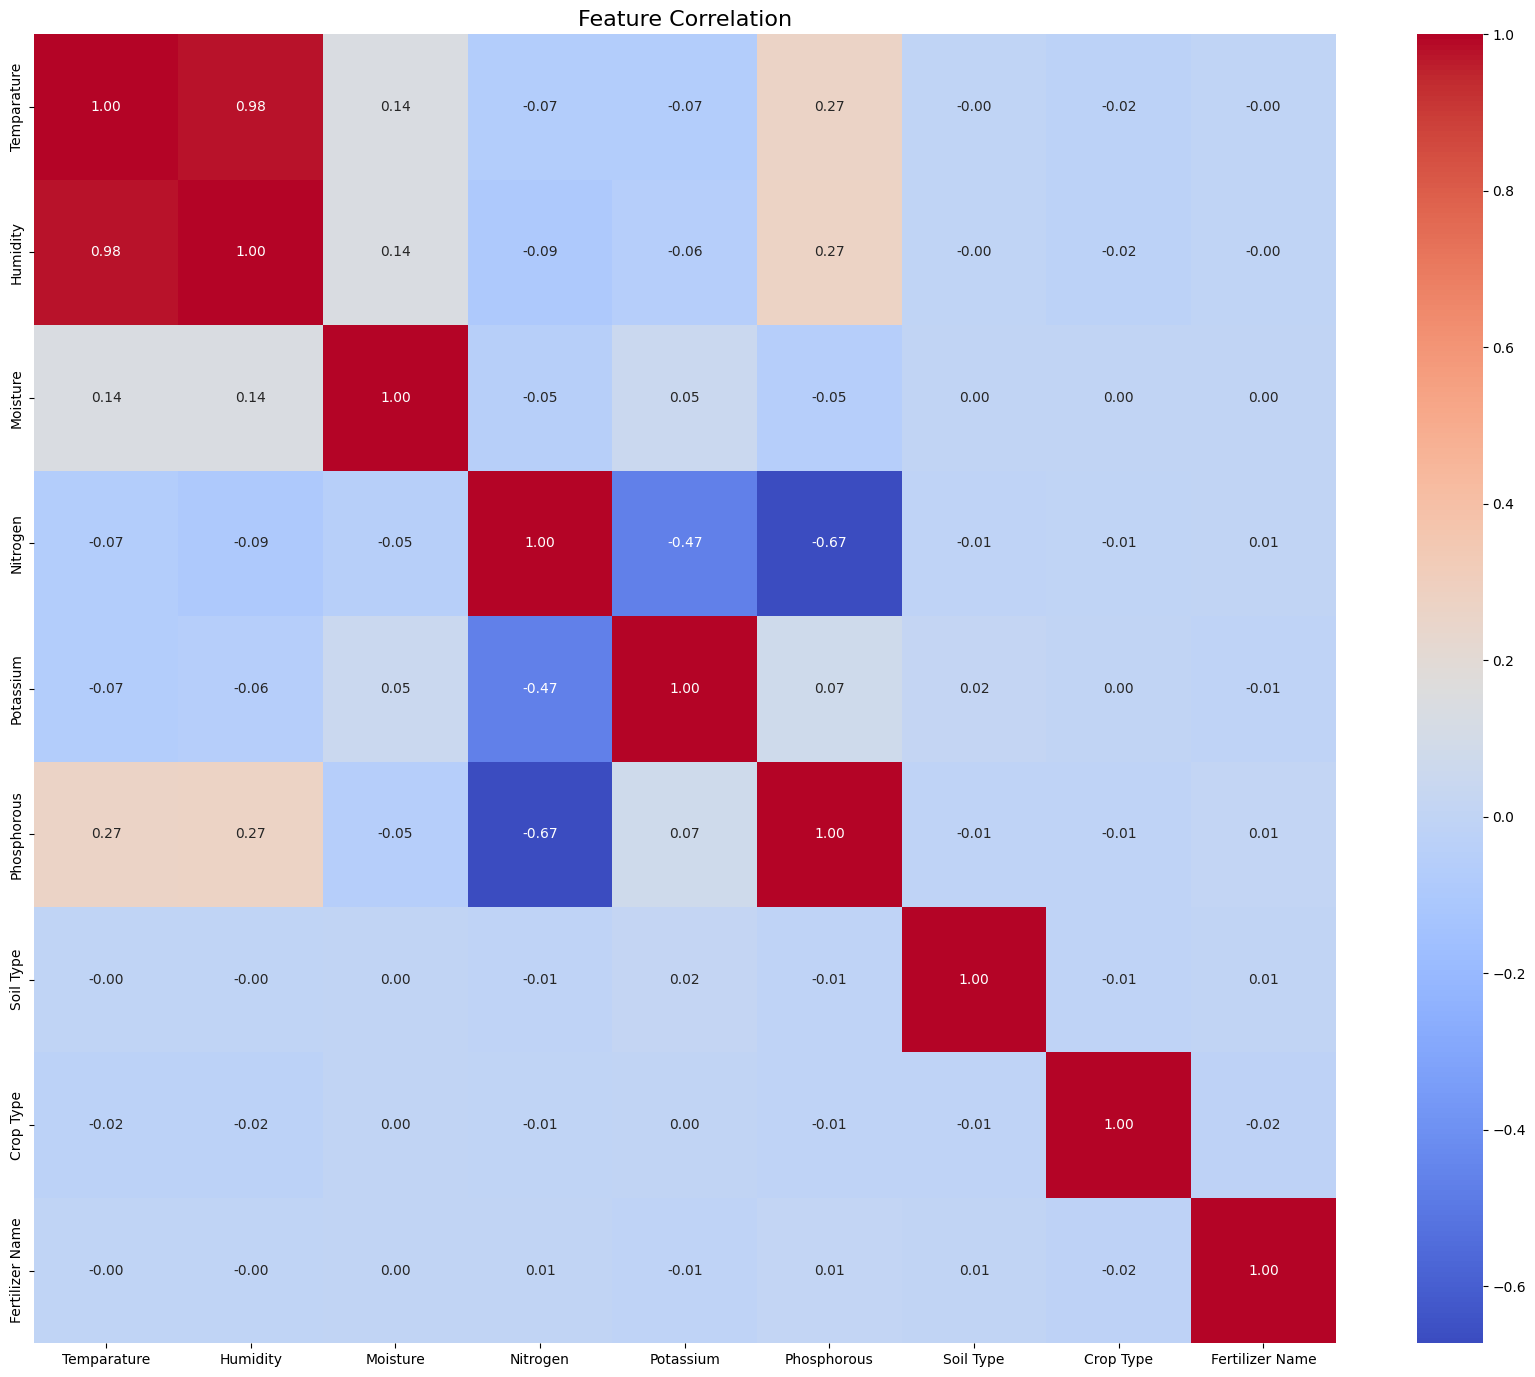

In [24]:
# Adjusting the figure size and font size for better readability
plt.figure(figsize=(21, 17))  # Increase figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})  # Adjust font size
plt.title("Feature Correlation", fontsize=16)  # Increase title font size
plt.xticks(fontsize=10)  # Adjust x-axis font size
plt.yticks(fontsize=10)  # Adjust y-axis font size
plt.show()

### ***Checking If Dataset is Imbalanced or Not?***

In [25]:
print(data['Fertilizer Name'].value_counts())

Fertilizer Name
6.0    3169
5.0    2655
4.0    2404
3.0    2115
1.0    1926
2.0    1318
0.0     663
Name: count, dtype: int64


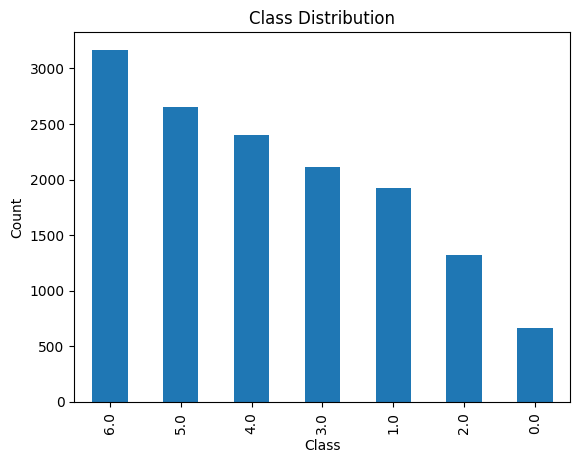

In [26]:
data['Fertilizer Name'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### **This is Imbalanced Dataset**
The dataset is imbalanced because the class distribution is uneven, with Class 6.0 having significantly more samples than Class 0.0 (approximately 6:1 ratio).\
This disproportionate representation can bias models toward the majority class, leading to poor performance on minority classes.

## **4. Dimensionality Reduction**

### *Principal Component Analysis (PCA)*

PCA transforms the data into new axes (principal components) that maximize variance, reducing dimensions while retaining the most important information.

In [27]:
pca = PCA(n_components=7)
data_pca = pca.fit_transform(data) # storing in different Dataset variable

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.49322844 0.25979162 0.11764103 0.06897842 0.02391031 0.02276949
 0.00820315]


### *Data Transformation*

In [28]:
# Initialize the scaler
scaler = MinMaxScaler()

In [29]:
# Separate features and target
X = data.drop(columns=['Fertilizer Name'])  # Drop the target column
y = data['Fertilizer Name']  # Target column

In [30]:
# Scale the features
scaled_features = scaler.fit_transform(X)

In [31]:
# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(scaled_features, columns=X.columns)

In [32]:
# Add the target column back to the DataFrame
data_scaled['label'] = y.values

In [33]:
# Check the first few rows of the scaled data
data_scaled.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type,Crop Type,label
0,0.279889,0.354651,0.057953,0.607988,0.424073,0.000000,1.00,0.1,4.0
1,0.590558,0.538124,0.582637,0.519169,0.450831,0.145832,0.25,1.0,4.0
2,0.347465,0.338806,0.490759,0.000000,0.208308,0.817084,0.75,0.9,6.0
3,0.579238,0.578020,0.536059,0.665264,0.000000,0.747139,0.00,1.0,3.0
4,0.455900,0.476717,0.519072,0.603290,0.000000,0.407880,0.50,0.0,6.0


In [34]:
data_scaled['label'].value_counts()

label
6.0    3169
5.0    2655
4.0    2404
3.0    2115
1.0    1926
2.0    1318
0.0     663
Name: count, dtype: int64

## **6. Modelling**

### *We Are going to Apply Following Models On Our Dataset:*
**- Logistic Regression (LR)**\
**- Support Vector Machine (SVM)**\
**- Random Forest (RF)**\
**- Decision Tree (DT)**\
**- Gradient Boosting (GB)**

### **Train/Test Split**

In [35]:
# Dividing The Target Column from Dataset
y = data_scaled['label']
X = data_scaled.drop(columns=['label'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print("Shape of X Train:",X_train.shape)
print("Shape of y Train:",y_train.shape)
print("Shape of X Test:",X_test.shape)
print("Shape of y Test:",y_test.shape)

Shape of X Train: (11400, 8)
Shape of y Train: (11400,)
Shape of X Test: (2850, 8)
Shape of y Test: (2850,)


### **Modelling**

In [38]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42,probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

In [39]:
# Results storage
results = []

In [40]:
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use appropriate average
    recall = recall_score(y_test, y_pred, average='weighted')  # Use appropriate average
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use appropriate average
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else "Not Applicable"
    
    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })

In [41]:
# Print results
for result in results:
    print(result)

{'Model': 'Logistic Regression', 'Accuracy': 0.22666666666666666, 'Precision': np.float64(0.09984917240096708), 'Recall': np.float64(0.22666666666666666), 'F1-Score': np.float64(0.08698430707555514), 'AUC': np.float64(0.501442395229206)}
{'Model': 'Decision Tree', 'Accuracy': 0.1712280701754386, 'Precision': np.float64(0.17262864436922853), 'Recall': np.float64(0.1712280701754386), 'F1-Score': np.float64(0.17180398481679943), 'AUC': np.float64(0.5037921844055647)}
{'Model': 'Support Vector Machine', 'Accuracy': 0.22035087719298246, 'Precision': np.float64(0.10638365871449913), 'Recall': np.float64(0.22035087719298246), 'F1-Score': np.float64(0.10262921877479653), 'AUC': np.float64(0.4878927571416988)}
{'Model': 'Random Forest', 'Accuracy': 0.20385964912280702, 'Precision': np.float64(0.18286850413398364), 'Recall': np.float64(0.20385964912280702), 'F1-Score': np.float64(0.18349007222513883), 'AUC': np.float64(0.5039451713728373)}
{'Model': 'XGBoost', 'Accuracy': 0.18526315789473685, 'P

In [42]:
# Convert hyper_results to a DataFrame
df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.226667,0.099849,0.226667,0.086984,0.501442
1,Decision Tree,0.171228,0.172629,0.171228,0.171804,0.503792
2,Support Vector Machine,0.220351,0.106384,0.220351,0.102629,0.487893
3,Random Forest,0.203860,0.182869,0.203860,0.183490,0.503945
4,XGBoost,0.185263,0.163011,0.185263,0.168760,0.511841


## **7. Hyperparameter tuning**

In [43]:
results=[]

### *Logistic Regression (No Tuning)*

In [44]:
# Fit the grid search
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
lr = LogisticRegression(max_iter=500, random_state=42)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_

# Make predictions
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)

# Metrics calculation
print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}


In [45]:
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')        
f1 = f1_score(y_test, y_pred_lr, average='weighted')                

# For AUC, you can compute it per class if y_test is multiclass
try:
    auc = roc_auc_score(y_test, y_prob_lr, multi_class='ovr')   
except ValueError:
    auc = "AUC not computable for the current target type."

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"AUC: {auc}")

Accuracy: 0.2281
Precision (weighted): 0.1097
Recall (weighted): 0.2281
F1 Score (weighted): 0.0898
AUC: 0.5016200904136052


In [46]:
# Append Logistic Regression metrics to the results list
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc if isinstance(auc, (float, int)) else "Not Applicable"
})

### *Decision Tree*

In [47]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Retrieve the best model and parameters
best_dt = grid_search_dt.best_estimator_
print(f"Best Parameters for Decision Tree: {grid_search_dt.best_params_}")

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [48]:
# Make predictions
y_pred_dt = best_dt.predict(X_test)

# Ensure the model supports predict_proba before using it for AUC calculation
y_prob_dt = best_dt.predict_proba(X_test) if hasattr(best_dt, "predict_proba") else None

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_dt, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_dt, average='weighted', zero_division=1)

# Calculate AUC if `predict_proba` is available
auc = roc_auc_score(y_test, y_prob_dt, multi_class='ovr') if y_prob_dt is not None else "Not Applicable"

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"AUC: {auc}")

Accuracy: 0.2249
Precision (weighted): 0.4251
Recall (weighted): 0.2249
F1 Score (weighted): 0.1107
AUC: 0.5025034739094446


In [49]:
# Append the results to the `results` list
results.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
})

### *Support Vector Machine*

In [50]:
# Define the parameter grid for SVM
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model (with probability=True for AUC calculation)
svc = SVC(random_state=42, probability=True)

# Perform Grid Search with 5-fold cross-validation
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='f1', n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

# Retrieve the best model and parameters
best_svc = grid_search_svc.best_estimator_
print(f"Best Parameters for SVM: {grid_search_svc.best_params_}")

Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [51]:
# Make predictions
y_pred_svc = best_svc.predict(X_test)

# Ensure `predict_proba` is available and get predicted probabilities
y_prob_svc = best_svc.predict_proba(X_test) if hasattr(best_svc, "predict_proba") else None

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_svc, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_svc, average='weighted', zero_division=1)

# Calculate AUC if `predict_proba` is available
auc = roc_auc_score(y_test, y_prob_svc, multi_class='ovr') if y_prob_svc is not None else "Not Applicable"

# Print metrics for SVM
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc if isinstance(auc, (float, int)) else 'Not Applicable'}")


Accuracy: 0.2267
Precision: 0.8247
Recall: 0.2267
F1 Score: 0.0838
AUC: 0.5017813161279685


In [52]:
# Append the results to the `results` list
results.append({
    "Model": "SVM",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
})

### *Random Forest*

In [53]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Retrieve the best model and parameters
best_rf = grid_search_rf.best_estimator_
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [54]:
# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Ensure `predict_proba` is available and get predicted probabilities
y_prob_rf = best_rf.predict_proba(X_test) if hasattr(best_rf, "predict_proba") else None

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_rf, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_rf, average='weighted', zero_division=1)

# Calculate AUC if `predict_proba` is available
auc = roc_auc_score(y_test, y_prob_rf, multi_class='ovr') if y_prob_rf is not None else "Not Applicable"

# Print metrics for Random Forest
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc if isinstance(auc, (float, int)) else 'Not Applicable'}")


Accuracy: 0.2232
Precision: 0.3601
Recall: 0.2232
F1 Score: 0.0863
AUC: 0.5039195323881535


In [55]:
# Append the results to the `results` list
results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
})

### *XGBoost*

In [56]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Initialize the XGBoost model with a specific evaluation metric
xgb = XGBClassifier(random_state=42, eval_metric="logloss")

# Perform Grid Search with 5-fold cross-validation
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Retrieve the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")

Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [57]:
# Make predictions
y_pred_xgb = best_xgb.predict(X_test)

# Ensure `predict_proba` is available and get predicted probabilities
y_prob_xgb = best_xgb.predict_proba(X_test) if hasattr(best_xgb, "predict_proba") else None

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
auc = roc_auc_score(y_test, y_prob_xgb, multi_class='ovr') if y_prob_xgb is not None else "Not Applicable"

# Print metrics for XGBoost
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc if isinstance(auc, (float, int)) else 'Not Applicable'}")

Accuracy: 0.2214
Precision: 0.3053
Recall: 0.2214
F1 Score: 0.0950
AUC: 0.5052100677988406


In [58]:
# Append the results to the `results` list
results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
})

#### *Since the metrics are in plain text or np arrays, let's convert them into a DataFrame and display it.*

### *Combine All Results*

In [59]:
results=pd.DataFrame(results)
results

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.228070,0.109733,0.228070,0.089830,0.501620
1,Decision Tree,0.224912,0.425108,0.224912,0.110675,0.502503
2,SVM,0.226667,0.824711,0.226667,0.083768,0.501781
3,Random Forest,0.223158,0.360086,0.223158,0.086263,0.503920
4,XGBoost,0.221404,0.305320,0.221404,0.094972,0.505210


### Evaluation Metrics Explained
- **Accuracy:** Measures how many predictions were correct out of all predictions.
- **Precision:** Focuses on the correctness of positive predictions.
- **Recall:** Emphasizes the completeness of positive predictions.
- **F1-Score:** Balances precision and recall.
- **AUC-ROC:** Indicates the model's discriminative ability.

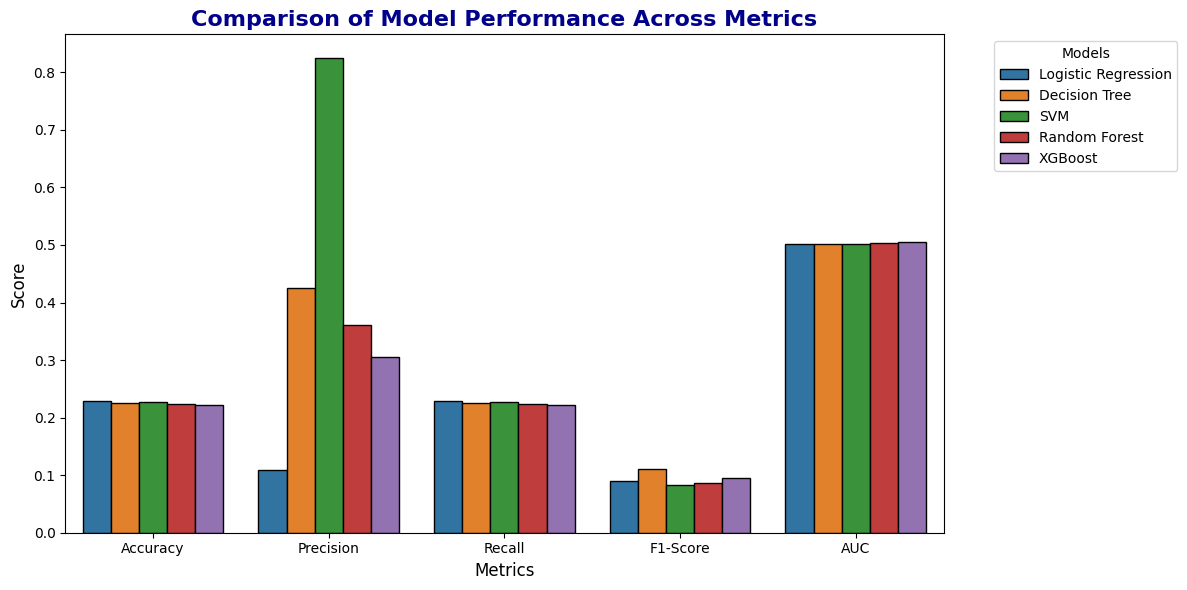

In [60]:
# Define the metrics to analyze and reshape the data
metrics = ["Accuracy", "Precision", "Recall", "F1-Score","AUC"]
results_subset = results.set_index("Model")[metrics].reset_index()
# Transform data into a long format for easier plotting
results_melted = results_subset.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", edgecolor="black")

plt.title("Comparison of Model Performance Across Metrics", fontsize=16, weight='bold', color='darkblue')
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()